In [4]:
import pandas as pd
# trocar pelo caminho do seu drive
caminho = '/content/DNAC2018.csv'

sinasc = pd.read_csv(caminho, dtype=str)

#transformacao dos dados
sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())

sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,2516381,110004,1,28,2,4,999994,1,0,120050,5,1,2,4,05032018,0842,2,9,10,4,3050.0,2,16032018,NaN,20180004,3.2.01,12042018,038,NaN,811,110004,11,3,3,20041989,4,1,0,1,35,01062017,39,8,8,02,1,2,1,1,2,3,05032018,06,0,1,1,05,1,5,1623
1,1,3152928,110012,1,39,2,5,223232,1,0,120040,5,1,1,4,11012018,1657,1,9,10,2,3440.0,2,19022018,NaN,20180005,3.2.01,05032018,053,NaN,812,120040,12,5,<NA>,11011979,2,1,1,0,32,20042017,37,8,9,02,1,2,3,1,2,4,NaN,08,0,1,1,03,1,5,3807
2,1,5618347,110020,1,33,2,4,521110,1,1,120001,5,1,2,4,08022018,1415,1,9,10,4,2920.0,2,16032018,NaN,20180004,3.2.01,10042018,061,NaN,811,110015,11,3,<NA>,26071984,4,2,0,1,<NA>,10052017,38,8,8,03,1,2,2,1,2,4,09022018,12,0,1,1,05,1,5,7192
3,1,5618347,110020,1,35,2,2,848305,2,0,120001,5,1,2,3,09022018,1850,1,9,9,4,3020.0,2,16032018,NaN,20180004,3.2.01,10042018,060,NaN,811,110008,11,1,<NA>,09101982,4,2,1,1,<NA>,05052017,39,8,6,04,1,2,2,1,2,4,09022018,10,0,1,1,05,1,2,7194
4,1,5618347,110020,1,21,2,3,NaN,2,0,120001,5,1,1,3,02032018,0336,2,8,9,1,3785.0,2,03042018,NaN,20180004,3.2.01,10042018,039,NaN,812,120001,12,2,<NA>,30051996,1,2,2,0,<NA>,05062017,38,8,6,04,2,2,3,1,2,3,03032018,11,0,1,1,07,1,2,7328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16538,1,2402092,293330,1,32,2,5,232120,0,0,120040,5,1,1,4,13082018,1104,2,7,9,4,1995.0,2,24092018,NaN,20180014,3.2.02,26092018,044,NaN,829,293330,29,5,<NA>,06071986,4,0,0,0,36,26112017,37,8,9,01,2,2,3,1,5,4,13082018,08,0,1,1,06,0,5,2088675
16539,1,2092611,350550,1,37,1,3,621005,6,0,120039,4,1,2,2,04072018,0932,1,1,10,4,2950.0,2,13072018,NaN,20180016,3.2.01,30072018,026,NaN,812,120039,12,1,4,05091980,4,6,6,0,<NA>,NaN,36,2,2,04,2,2,1,1,2,4,04072018,02,0,1,1,07,1,2,2360071
16540,1,2080575,355030,1,37,2,5,241005,1,0,120040,5,1,2,4,12122018,1051,2,7,8,1,3120.0,1,19122018,Q201Q212,20180053,3.2.01,26122018,014,NaN,812,120040,12,5,<NA>,20041981,1,1,0,1,38,15032018,39,8,16,01,1,2,1,1,2,3,12122018,08,0,1,1,05,1,5,2601966
16541,1,7306504,520870,1,37,2,5,231205,0,0,120045,4,1,2,4,22122018,1015,1,4,7,4,2180.0,2,21082019,NaN,20190050,3.2.01,22082019,243,NaN,852,520870,52,5,<NA>,19111981,4,0,0,0,<NA>,15042018,36,8,18,04,2,2,1,1,2,3,22122018,08,0,1,1,06,0,2,2914104


In [11]:
viuvas_filhosVivos = sinasc[sinasc.ESTCIVMAE == '3']['QTDFILVIVO']
viuvas_filhosVivos = viuvas_filhosVivos.reset_index(drop=True) #reseta o índice
viuvas_filhosVivos = viuvas_filhosVivos.set_index('CONTADOR') #escolhe a coluna que ficará no índice (textinho abaixo do eixo y')
viuvas_filhosVivos

0     <NA>
1        1
2        3
3        4
4        1
5        1
6        3
7        6
8        0
9        1
10       2
11       2
12       7
13       3
Name: QTDFILVIVO, dtype: Int64

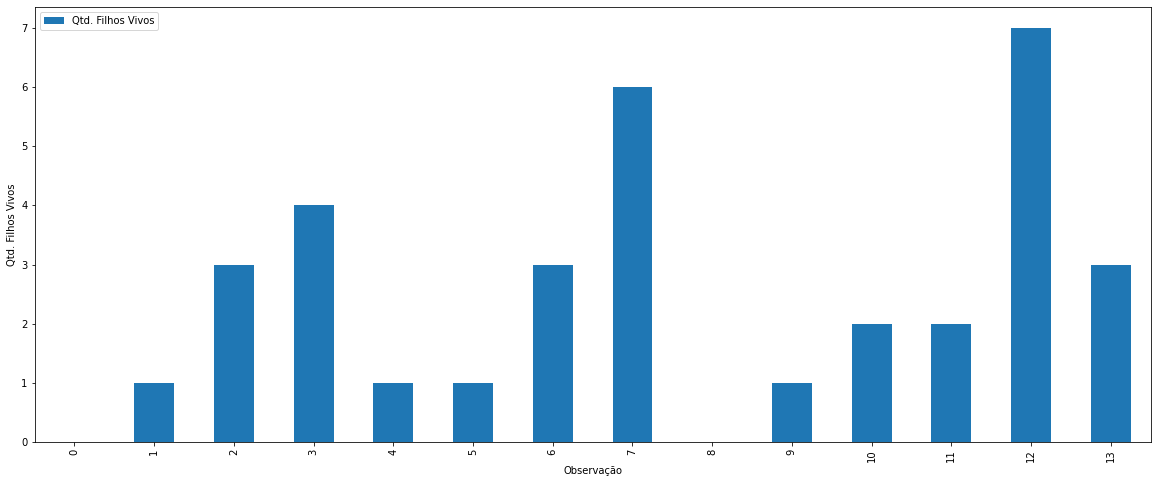

In [13]:
#CRIANDO GRÁFICO DE BARRAS

barras = viuvas_filhosVivos.plot(kind='bar', y='QTDFILVIVO', width=0.5, figsize=(20,8)) #Plotando gráfico, y= escolhe a coluna do eixo y, figsize - Define tamanho do gráfico e width define largura das barrinhas
barras.set(xLabel='Observação', yLabel='Qtd. Filhos Vivos') #Colocando Legenda
barras.legend(["Qtd. Filhos Vivos"])

[Text(0, 0.5, 'Qtd'), Text(0.5, 0, 'MUNICÍPIO DE NASCIMENTO')]

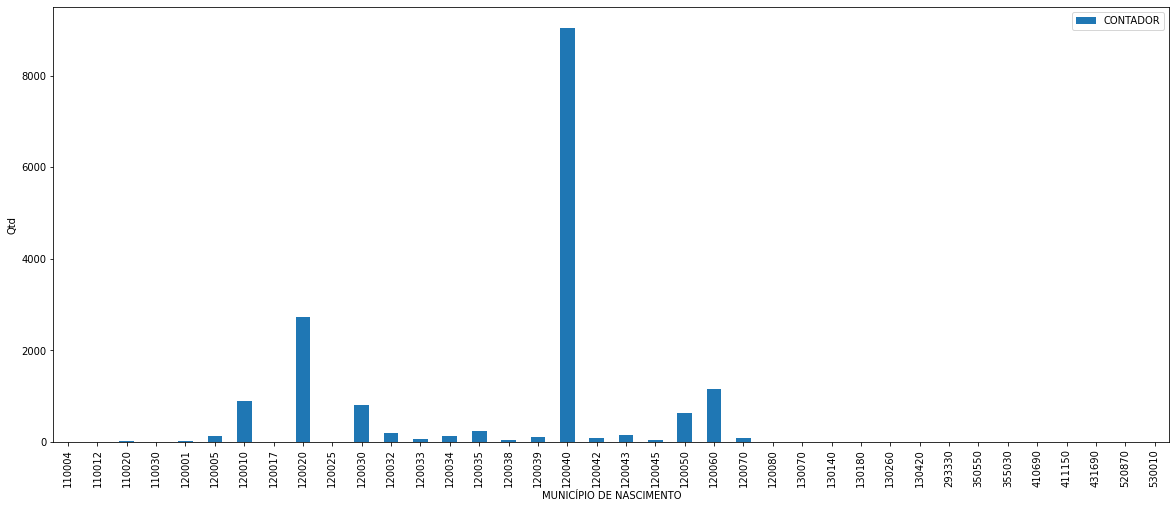

In [20]:
#Frequencia de Nacimentos por Município 

grupo = sinasc.groupby(by='CODMUNNASC').count() #Criando um agrupamento por código do municipio de nascimento
barras = grupo[['CONTADOR']].plot(kind='bar', figsize=(20,8))
barras.set(xLabel='MUNICÍPIO DE NASCIMENTO', yLabel='Qtd') #Colocando Legenda

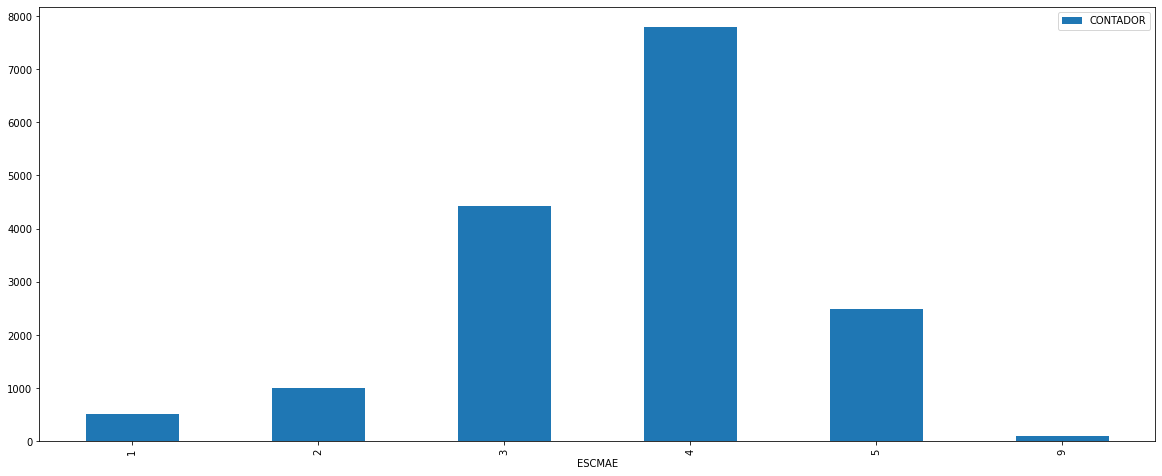

In [22]:
#Calcule a Frequência de nascimentos por escolaridade da mãe (ESCMAE)
grupo = sinasc.groupby(by='ESCMAE').count() #Criando um agrupamento por código do municipio de nascimento
barras = grupo[['CONTADOR']].plot(kind='bar',figsize=(20,8)) #Escolhemos a coluna Contador porque nela nao tem dados nulos, não escolha colunas que possuem dados nulos.

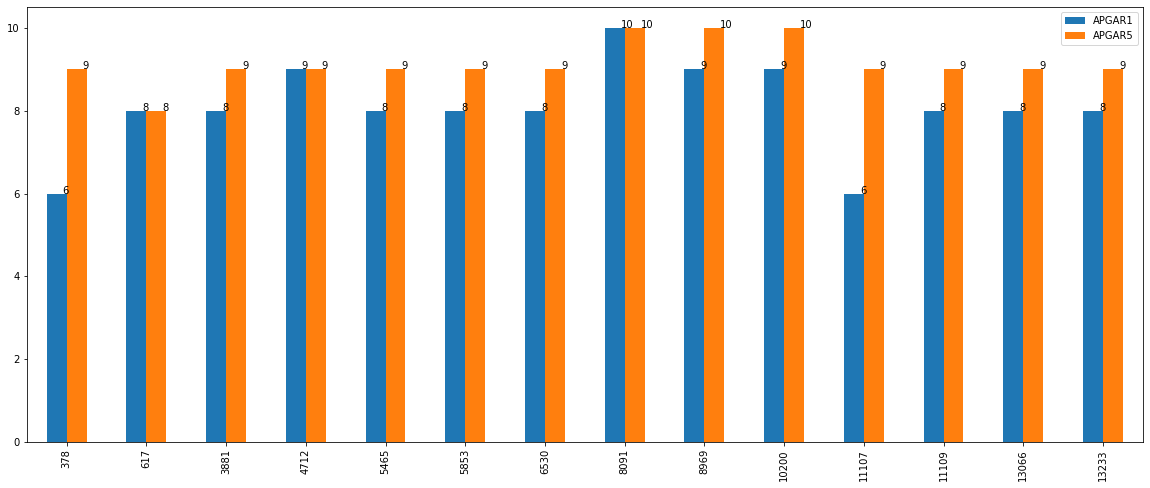

In [32]:
viuvas_apgar = sinasc[sinasc.ESTCIVMAE=='3'][['APGAR1','APGAR5']]
barras = viuvas_apgar.plot(kind='bar',figsize=(20,8))

#Adicionando os rótulos as colunas
for i in barras.patches:
  barras.text(i.get_x()+.2, i.get_height(), i.get_height()) 

**GRÁFICO DE PIZZA - BOM PARA PORCENTAGENS**

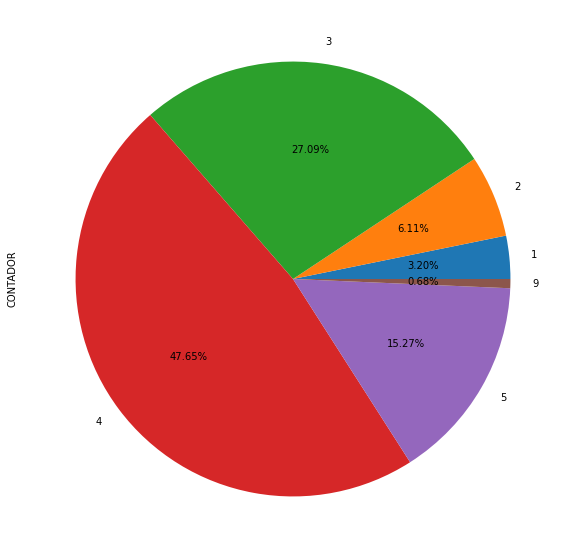

In [40]:
grupo = sinasc.groupby(by='ESCMAE').count() #Criando um agrupamento por código do municipio de nascimento
pizza = grupo['CONTADOR'].plot(kind='pie', figsize=(10,10), autopct='%1.2f%%') #criando gráfico de pizza, autopct formata as porcentagens no formato %1.2f%% Duas casas após a vírgula 

**GRÁFICO DE HISTOGRAMA - BOM PARA DISTRIBUIÇÕES DE FREQUÊNCIAS OU DISTRIBUIÇÕES DOS DADOS**

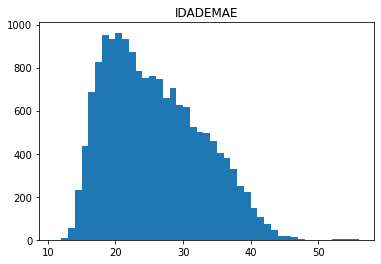

In [46]:
bins_values = sinasc.IDADEMAE.value_counts() #os bins são atributos usados para saber as ditribuicoes dos grupos
hist = sinasc.hist(column='IDADEMAE', bins=sorted(bins_values.keys()),grid=False) #

**GRÁFICO DE DISPERSÃO**

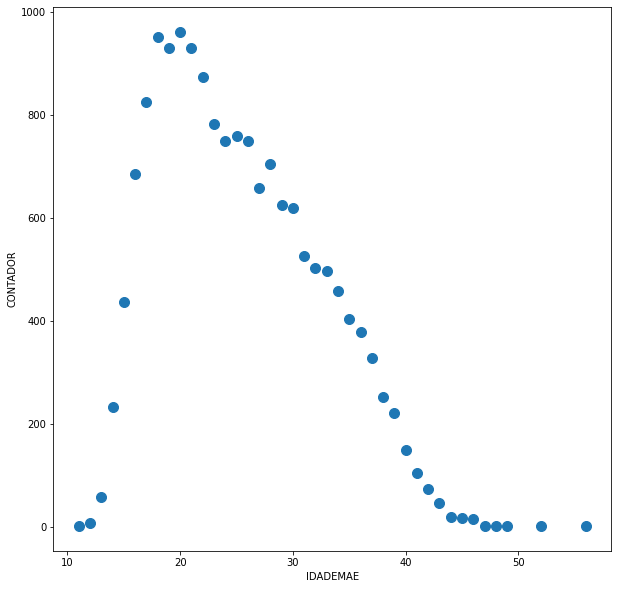

In [49]:
grupo = sinasc.groupby(by='IDADEMAE').count().reset_index() #Criando um agrupamento por código do municipio de nascimento
disp = grupo.plot(kind='scatter', x='IDADEMAE', y='CONTADOR',figsize=(10,10), s=100)

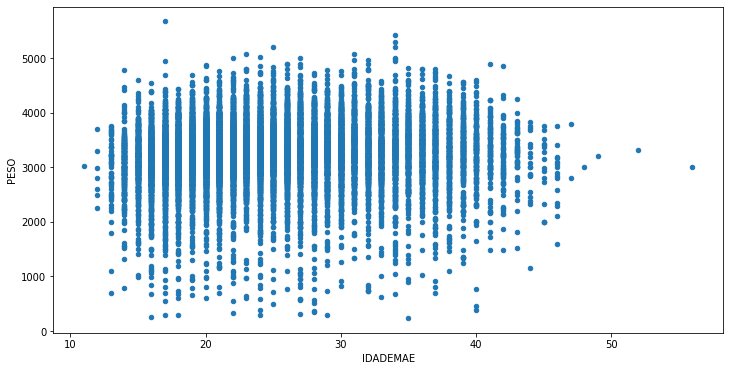

In [59]:
sinascDisp = sinasc[['IDADEMAE','PESO']].dropna() #Removendo valores nulos
disp = sinascDisp.plot(kind='scatter',x='IDADEMAE', y='PESO',figsize=(12,6)) #inserindo dois dados para comparação dos dados

**BOXPLOT - Bom para apresentar os Quartis e a Mediana, os pontos pretos são os Outliers, ou dados que estão bem fora do padrão dos dados, bom para apresentarn dados Quantitativos**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


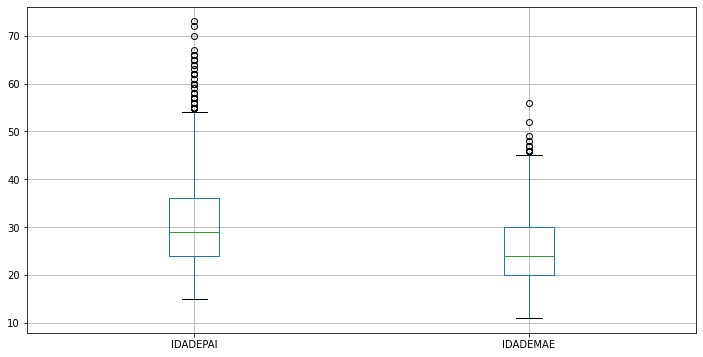

In [66]:
bp = sinasc.boxplot(column=['IDADEPAI','IDADEMAE'],figsize=(12,6)) #cOMPARANDO MAIS DE UM VALOR NO BOXPLOT, PODE-SE COLOCAR UM SÓ TAMBÉM

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


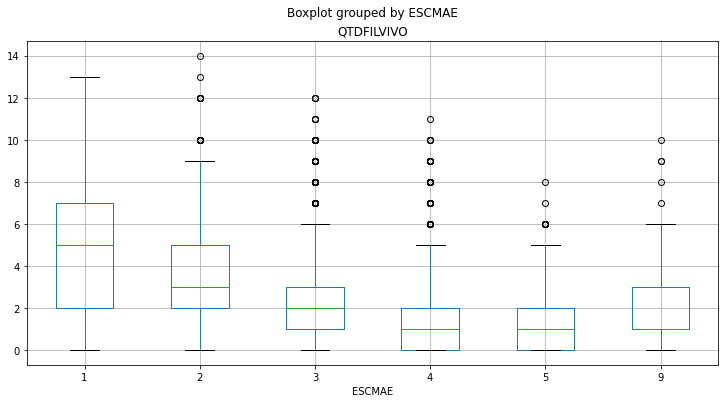

In [67]:
bp = sinasc.boxplot(column=['QTDFILVIVO'],by='ESCMAE',figsize=(12,6)) #cOMPARANDO MAIS DE UM VALOR NO BOXPLOT, PODE-SE COLOCAR UM SÓ TAMBÉM